**NAME**
: De Guzman, Aero Kent D.

**COURSE/SECTION**
: CPE311/CPE22S3

**DATE CREATED**
: 04/13/2025

**DATE SUBMITTED**
: 04/13/2025

**INSTRUCTOR**
: Engr. Roman Richard

**Procedures:**

9.1 Introduction to Matplotlib

9.2 Plotting with Pandas

9.3 Pandas Plotting Subpackage

**Data Analysis:**

Provide comments on output from the procedures above.

Based on the provided procedures, it was taught under here further visualization functionalities of both pandas as well as pyplot under matplotlib.
While there are already pre-existing visualization built-in functions already present within the pandas module, it was further explain and utilized
on the different parameters as well as to efficiently use it under provided modules on these procedures. Under the pandas module, the .plot()
can be seen to be used in the procedures wherein the nature of this graph changes based on the argument of kin = '' which will dicatate what kind
of plot you will simply used. The functionalities under this plot on pandas are sufficient enough for a lot of surface level and even further
complicated visual analysis since most of the common utilized and customization can be found already under its parameters such as specifying within
the total axes as well as the sizes of them and their overall figure.

Pyplot on the other hand which is also taught under this procedures contains a variety of customization function compared to pandas where a lot
of customization is now available but the procedures and options are a bit more complicated now to do such as specifing in a separate line
the datas of the overall titles for example than simply placing them as an argument. To simply put, the functionalities of Pandas can be done by
pyplot but with more customization options as well as with the cost of being a bit more complicated.

**Supplementary Activity:**

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

* The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

* The second subplot will be a bar plot showing the net effect this had monthly, using resample().

* Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

* Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

In [82]:
# Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

import pandas as pd

fb = pd.read_csv('datasets/fb_stock_prices_2018.csv')
df1 = fb[['date','close']].copy()
df1.set_index('date', inplace = True)
df1 = df1.rolling(20).min()
print(df1.iloc[0:20]) # to verify that it is really rolling for 20 days, if
                                        # there are NaN <20 days then it is working since it 
                                        # is supposed to do that.
df1

            close
date             
2018-01-02    NaN
2018-01-03    NaN
2018-01-04    NaN
2018-01-05    NaN
2018-01-08    NaN
2018-01-09    NaN
2018-01-10    NaN
2018-01-11    NaN
2018-01-12    NaN
2018-01-16    NaN
2018-01-17    NaN
2018-01-18    NaN
2018-01-19    NaN
2018-01-22    NaN
2018-01-23    NaN
2018-01-24    NaN
2018-01-25    NaN
2018-01-26    NaN
2018-01-29    NaN
2018-01-30  177.6


,close
date,
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,NaN
2018-01-08,NaN
...,...
2018-12-24,124.06
2018-12-26,124.06
2018-12-27,124.06


<Axes: ylabel='Density'>

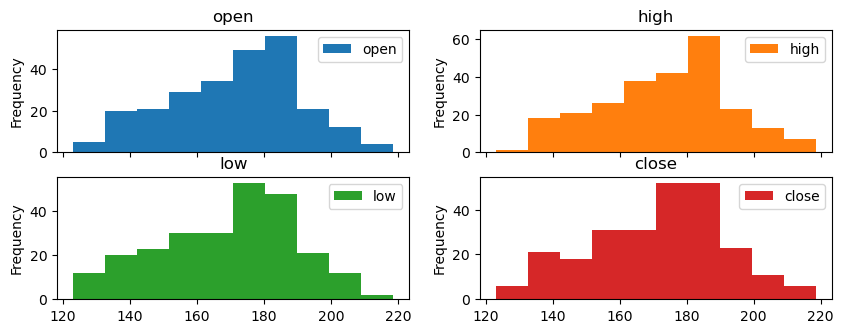

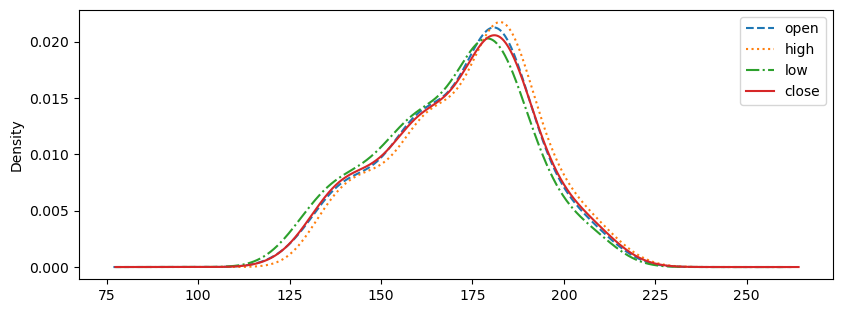

In [159]:
# 2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

df2 = fb[['open','high','low','close']].copy()
# Histogram
df2.plot(kind = 'hist',
         y = ['open','high','low','close'],
         title = ['open','high','low','close'],
         subplots = True,
         layout = (2,2),
         figsize = (10,3.5))
# KDE
df2.plot(kind = 'kde', style = ['--',':','-.'], figsize = (9.725,3.5))

    mag magType           time                  place  tsunami parsed_place
0  1.35      ml  1539475168010  9km NE of Aguanga, CA        0   California
1  1.29      ml  1539475129610  9km NE of Aguanga, CA        0   California
2  3.42      ml  1539475062610  8km NE of Aguanga, CA        0   California
3  0.44      ml  1539474978070  9km NE of Aguanga, CA        0   California
4  2.16      md  1539474716050  10km NW of Avenal, CA        0   California
['mb' 'mww' 'ms_20' 'mwr']


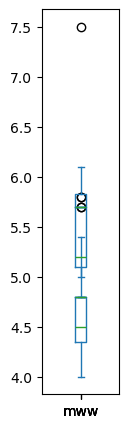

In [261]:
# 3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

quakes = pd.read_csv('datasets/earthquakes-1.csv')
print(quakes.head())
df2 = quakes.query("parsed_place == 'Indonesia'").reset_index().copy()
print(df2.magType.unique()) # types of magnitude

magdf = df2.groupby('magType')['mag'].plot(kind='box', figsize = (1,5))

<Axes: xlabel='date'>

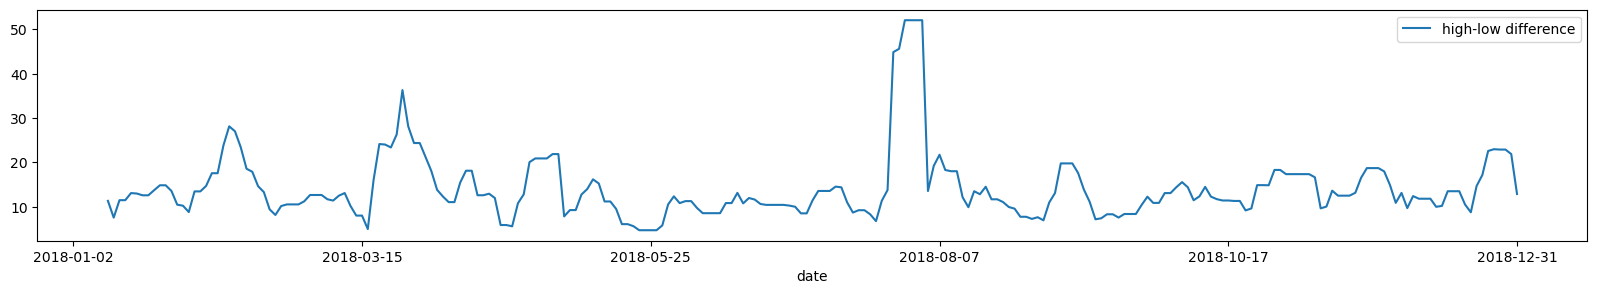

In [305]:
# 4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

df4 = fb.set_index('date').copy()
df4['maxhigh (mxH)'] = df4['high'].rolling(7).max()
df4['minlow (mnL)'] = df4['low'].rolling(7).min()
df4['high-low difference'] = df4['maxhigh (mxH)'] - df4['minlow (mnL)']
df4.plot(kind = 'line', y = 'high-low difference', figsize = (20,3))

FIRST SUBPLOT
              open    high       low   close    volume  open-close
date                                                              
2018-01-02  177.68  181.58  177.5500  181.42  18151903         NaN
2018-01-03  181.88  184.78  181.3300  184.67  16886563        0.46
2018-01-04  184.90  186.21  184.0996  184.33  13880896        0.23
2018-01-05  185.59  186.90  184.9300  186.85  13574535        1.26
2018-01-08  187.20  188.90  186.3300  188.28  17994726        0.35
...            ...     ...       ...     ...       ...         ...
2018-12-24  123.10  129.74  123.0200  124.06  22066002       -1.85
2018-12-26  126.00  134.24  125.8900  134.18  39723370        1.94
2018-12-27  132.44  134.99  129.6700  134.52  31202509       -1.74
2018-12-28  135.34  135.92  132.2000  133.20  22627569        0.82
2018-12-31  134.45  134.64  129.9500  131.09  24625308        1.25

[251 rows x 6 columns]


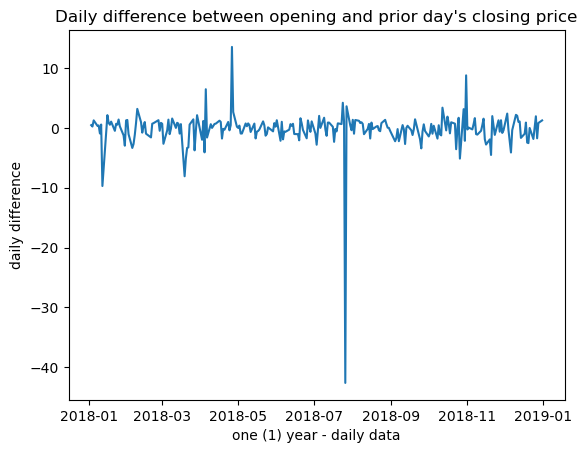

SECOND SUBPLOT
                 open       high        low    close     volume  open-close
date                                                                       
2018-01-31  3871.6600  3910.4300  3841.4199  3884.22  495655736     -3.3500
2018-02-28  3433.7100  3479.4967  3377.3762  3425.12  516621991      0.0200
2018-03-31  3642.4400  3699.5475  3580.6700  3643.28  996232472    -19.3700
2018-04-30  3447.4347  3487.8186  3392.4710  3440.02  751130388     19.6247
2018-05-31  4002.0312  4045.2092  3980.9007  4024.46  401144183     -2.6488


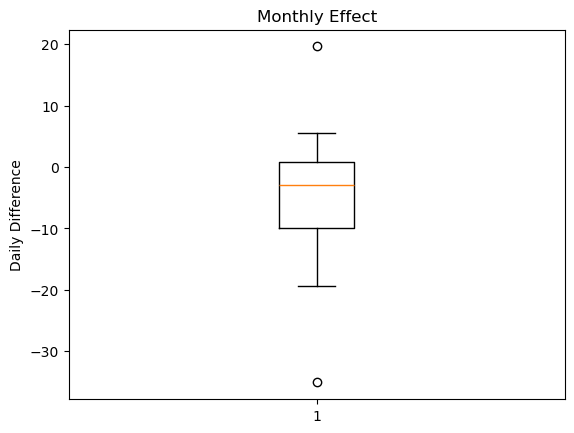

In [480]:
# 5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:
# 5.1 The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).
# 5.2 The second subplot will be a bar plot showing the net effect this had monthly, using resample().
# Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).
# Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

import matplotlib.pyplot as plt

fb['date'] = pd.to_datetime(fb['date'])
sub1 = fb.set_index('date').copy()

# first subplot : line plot of the open-close difference
print('FIRST SUBPLOT')
sub1['open-close'] = sub1['open'] - sub1['close'].shift(1) # curr. day open data - prev. day close data = diff. data
print(sub1)                                                # first entry is NaN since there is no prev. do compute.

plt.plot(sub1['open-close'])
plt.xlabel('one (1) year - daily data')
plt.ylabel('daily difference')
plt.title("Daily difference between opening and prior day's closing price")
plt.show()

# second subplot : a bar plot showing the net effect this had monthly, using resample().
print('SECOND SUBPLOT')
sub2 = sub1.resample('ME').sum().copy() # >> FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
print(sub2.head())
plt.boxplot(sub2['open-close'])
plt.ylabel('Daily Difference')
plt.title("Monthly Effect")
plt.show()

**Summary/Conclusion:**

Provide a summary of your learnings and the conclusion for this activity.

To conclude the following activity, it was all about the creation of utilization of visualization modules such as pyplot from matplotlibrary as well as the integrated plotting functions already found within pandas using plot(kind=''). It was provided here the different functions to visualize the provided data in combination wihtin a pandas dataframe such as using a simple line plot as well as boxplot to gauge the frequencies of these entries. Pre-calculations on how to construct a proper data input was also shown wherein some datas must first be modified in order to properly insert them for visualization in these plots such as converting a specific object into a form of numerical first in order to visualize its frequency for example. In addition with these, different ways on how to style these visualization as well as to segragate them to better visualize them was also taught which can aid to better and properly see and analyze the data by further enchancing their visual styles